<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [149]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [150]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv')

#Exploratory Data Analysis
print('Data Feature Names:')
for name in data.columns:
    if name != 'win':
        print(name)
print()
print(data['win'].head(10))
print(f'data shape:{data.shape}')

#Data Preprocessing
X = data.drop(columns=['win'])
y = data['win']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(f'X_train shape: {X_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_train shape: ({y_train.shape})')
display(f'y_test shape: ({y_test.shape})')

from torch.utils.data import DataLoader, TensorDataset

#Standardize the data
scalar = StandardScaler()
#Transform the feature data
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#Conver the data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

#Create Tensor dataset and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



Data Feature Names:
kills
deaths
assists
gold_earned
cs
wards_placed
wards_killed
damage_dealt

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: win, dtype: int64
data shape:(1000, 9)


'X_train shape: (800, 8)'

'X_test shape: (200, 8)'

'y_train shape: ((800,))'

'y_test shape: ((200,))'

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [151]:
## Write your code here
import torch.nn as nn
import torch.optim as optim

print(X_train.shape)

class log_network(nn.Module):
    def __init__(self, input_size=8, hidden_size=12, output_size=1):
        super(log_network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        return self.sigmoid(X)

#Initialize the model
model = log_network(input_size=8, hidden_size=6, output_size=1)
#Create the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)




torch.Size([800, 8])


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


Epoch [1/1000], Train Loss: 0.7093, Test Loss: 0.7054
Epoch [2/1000], Train Loss: 0.7079, Test Loss: 0.7040
Epoch [3/1000], Train Loss: 0.7063, Test Loss: 0.7028
Epoch [4/1000], Train Loss: 0.7047, Test Loss: 0.7018
Epoch [5/1000], Train Loss: 0.7046, Test Loss: 0.7007
Epoch [6/1000], Train Loss: 0.7042, Test Loss: 0.6998
Epoch [7/1000], Train Loss: 0.7033, Test Loss: 0.6988
Epoch [8/1000], Train Loss: 0.7013, Test Loss: 0.6982
Epoch [9/1000], Train Loss: 0.7016, Test Loss: 0.6975
Epoch [10/1000], Train Loss: 0.7005, Test Loss: 0.6969
Epoch [11/1000], Train Loss: 0.7005, Test Loss: 0.6963
Epoch [12/1000], Train Loss: 0.6992, Test Loss: 0.6958
Epoch [13/1000], Train Loss: 0.6983, Test Loss: 0.6953
Epoch [14/1000], Train Loss: 0.6990, Test Loss: 0.6948
Epoch [15/1000], Train Loss: 0.6988, Test Loss: 0.6945
Epoch [16/1000], Train Loss: 0.6984, Test Loss: 0.6940
Epoch [17/1000], Train Loss: 0.6982, Test Loss: 0.6937
Epoch [18/1000], Train Loss: 0.6977, Test Loss: 0.6934
Epoch [19/1000], Tr

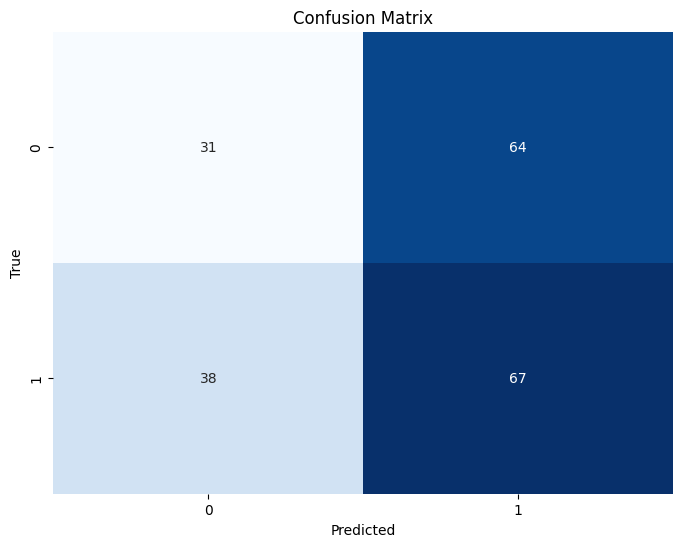


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        95
           1       0.51      0.64      0.57       105

    accuracy                           0.49       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.49      0.48       200



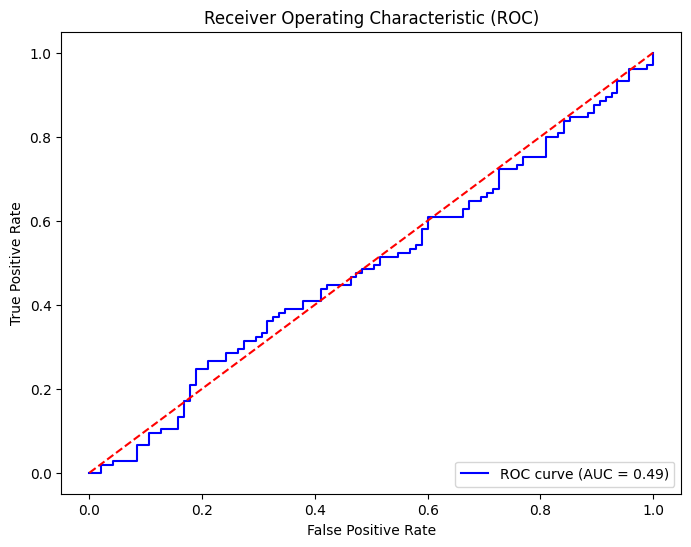

In [152]:
# Write your code here
epochs = 50
train_losses = []
test_lossess = []

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Define the model
class log_network(nn.Module):
    def __init__(self, input_size=8, hidden_size=12, output_size=1):  # Hidden size = 12
        super(log_network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        return self.sigmoid(X)

# Initialize the model
model = log_network(input_size=8, hidden_size=12, output_size=1)

# Define loss and optimizer (L2 regularization via weight_decay)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)  # L2 regularization

# Train the model
epochs = 1000
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Accuracy computation
def compute_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            y_pred = model(x_batch)
            predicted = (y_pred > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.squeeze() == y_batch).sum().item()
    return correct / total

train_accuracy = compute_accuracy(model, train_loader)
test_accuracy = compute_accuracy(model, test_loader)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# --- Evaluate on test set ---

# Get predicted probabilities and labels
y_pred_proba = []
y_pred_labels = []
y_true = []

with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        y_pred_proba.append(y_pred_batch.squeeze().numpy())
        y_pred_labels.append((y_pred_batch > 0.5).float().squeeze().numpy())
        y_true.append(y_batch.numpy())

y_pred_proba = np.concatenate(y_pred_proba)
y_pred_labels = np.concatenate(y_pred_labels)
y_test = np.concatenate(y_true)

# --- Confusion Matrix ---
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred_labels)

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# --- ROC Curve ---
def plot_roc_curve(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, y_pred_proba)


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [153]:
## Write your code here

#Add weights decay to the optimizer
class log_network(nn.Module):
    def __init__(self, input_size=8, hidden_size=6, output_size=1):
        super(log_network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        return self.sigmoid(X)

#Initialize the model
model = log_network(input_size=8, hidden_size=6, output_size=1)
#Create the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr =0.01, weight_decay=0.01)

#Change to 1000 epochs 
epochs = 1000
train_losses = []
test_lossess = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_lossess.append(test_loss)
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

def compute_acccuracy(model, data_loader):
    model.eval()
    correct = 0 
    total = 0
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            y_pred = model(x_batch)
            predicted = (y_pred > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.squeeze() == y_batch).sum().item()
    return correct / total 

train_accuracy = compute_acccuracy(model, train_loader)
test_accuracy = compute_acccuracy(model, test_loader)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [1/1000], Train Loss: 0.6984, Test Loss: 0.7114
Epoch [2/1000], Train Loss: 0.6988, Test Loss: 0.7110
Epoch [3/1000], Train Loss: 0.6980, Test Loss: 0.7106
Epoch [4/1000], Train Loss: 0.6975, Test Loss: 0.7103
Epoch [5/1000], Train Loss: 0.6973, Test Loss: 0.7100
Epoch [6/1000], Train Loss: 0.6986, Test Loss: 0.7097
Epoch [7/1000], Train Loss: 0.6965, Test Loss: 0.7094
Epoch [8/1000], Train Loss: 0.6970, Test Loss: 0.7091
Epoch [9/1000], Train Loss: 0.6965, Test Loss: 0.7089
Epoch [10/1000], Train Loss: 0.6968, Test Loss: 0.7086
Epoch [11/1000], Train Loss: 0.6960, Test Loss: 0.7084
Epoch [12/1000], Train Loss: 0.6965, Test Loss: 0.7082
Epoch [13/1000], Train Loss: 0.6964, Test Loss: 0.7079
Epoch [14/1000], Train Loss: 0.6957, Test Loss: 0.7077
Epoch [15/1000], Train Loss: 0.6958, Test Loss: 0.7075
Epoch [16/1000], Train Loss: 0.6954, Test Loss: 0.7073
Epoch [17/1000], Train Loss: 0.6946, Test Loss: 0.7072
Epoch [18/1000], Train Loss: 0.6946, Test Loss: 0.7070
Epoch [19/1000], Tr

### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


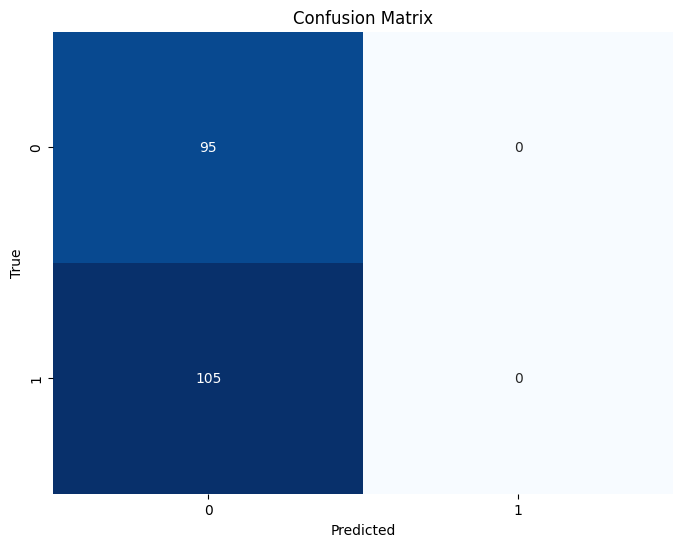

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        95
           1       0.00      0.00      0.00       105

    accuracy                           0.47       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.47      0.31       200



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


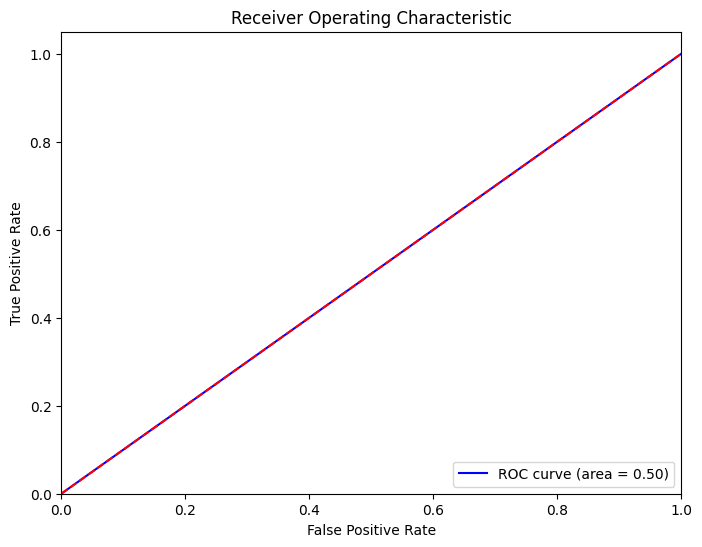

Epoch [1/1000], Train Loss: 0.6935, Test Loss: 0.6933
Epoch [2/1000], Train Loss: 0.6927, Test Loss: 0.6933
Epoch [3/1000], Train Loss: 0.6926, Test Loss: 0.6933
Epoch [4/1000], Train Loss: 0.6925, Test Loss: 0.6932
Epoch [5/1000], Train Loss: 0.6921, Test Loss: 0.6932
Epoch [6/1000], Train Loss: 0.6927, Test Loss: 0.6931
Epoch [7/1000], Train Loss: 0.6918, Test Loss: 0.6931
Epoch [8/1000], Train Loss: 0.6915, Test Loss: 0.6931
Epoch [9/1000], Train Loss: 0.6917, Test Loss: 0.6931
Epoch [10/1000], Train Loss: 0.6923, Test Loss: 0.6931
Epoch [11/1000], Train Loss: 0.6918, Test Loss: 0.6931
Epoch [12/1000], Train Loss: 0.6921, Test Loss: 0.6931
Epoch [13/1000], Train Loss: 0.6918, Test Loss: 0.6931
Epoch [14/1000], Train Loss: 0.6913, Test Loss: 0.6932
Epoch [15/1000], Train Loss: 0.6918, Test Loss: 0.6932
Epoch [16/1000], Train Loss: 0.6916, Test Loss: 0.6932
Epoch [17/1000], Train Loss: 0.6909, Test Loss: 0.6932
Epoch [18/1000], Train Loss: 0.6912, Test Loss: 0.6933
Epoch [19/1000], Tr

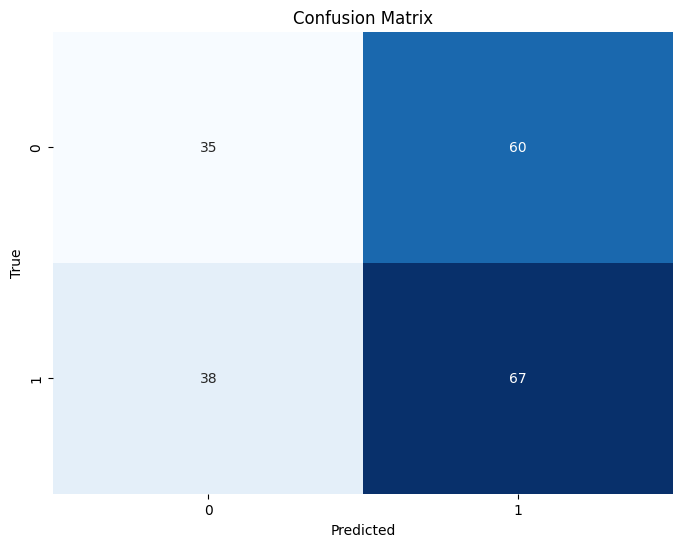

              precision    recall  f1-score   support

           0       0.48      0.37      0.42        95
           1       0.53      0.64      0.58       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



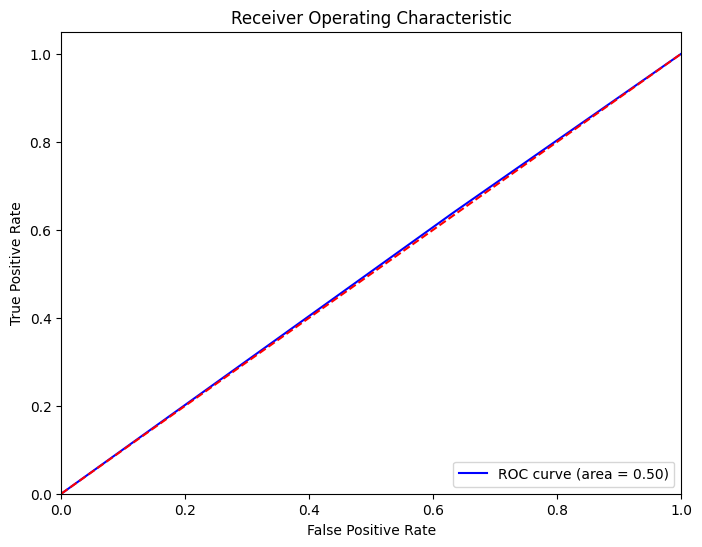

In [158]:
## Write your code here
import matplotlib.pyplot as plt

##Plot confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
plot_confusion_matrix(y_test, y_pred)

#Print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Plot ROC curve 
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
y_pred_proba = y_pred
y_pred_proba = y_pred_proba.flatten()
# Remove unnecessary .numpy() calls as y_test and y_pred are already NumPy arrays
y_test = y_test.flatten()
y_pred_proba = y_pred_proba.flatten()
plot_roc_curve(y_test, y_pred)

## Write your code here

#Add weights decay to the optimizer
class log_network(nn.Module):
    def __init__(self, input_size=8, hidden_size=12, output_size=1): #Increase hiddeen size to 12
        super(log_network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.fc1(X)
        X = self.relu(X)
        X = self.fc2(X)
        return self.sigmoid(X)

#Initialize the model
model = log_network(input_size=8, hidden_size=12, output_size=1)
#Create the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr =0.01, weight_decay=0.001) # change to 0.1

#Change to 1000 epochs 
epochs = 1000
train_losses = []
test_lossess = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_lossess.append(test_loss)
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

def compute_acccuracy(model, data_loader):
    model.eval()
    correct = 0 
    total = 0
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            y_pred = model(x_batch)
            predicted = (y_pred > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted.squeeze() == y_batch).sum().item()
    return correct / total 

train_accuracy = compute_acccuracy(model, train_loader)
test_accuracy = compute_acccuracy(model, test_loader)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

## Write your code here
import matplotlib.pyplot as plt

##Plot confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
plot_confusion_matrix(y_test, y_pred)

#Print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#Plot ROC curve 
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
y_pred_proba = y_pred
y_pred_proba = y_pred_proba.flatten()
# Remove unnecessary .numpy() calls as y_test and y_pred are already NumPy arrays
y_test = y_test.flatten()
y_pred_proba = y_pred_proba.flatten()
plot_roc_curve(y_test, y_pred)

Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


              precision    recall  f1-score   support

           0       0.48      0.37      0.42        95
           1       0.53      0.64      0.58       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



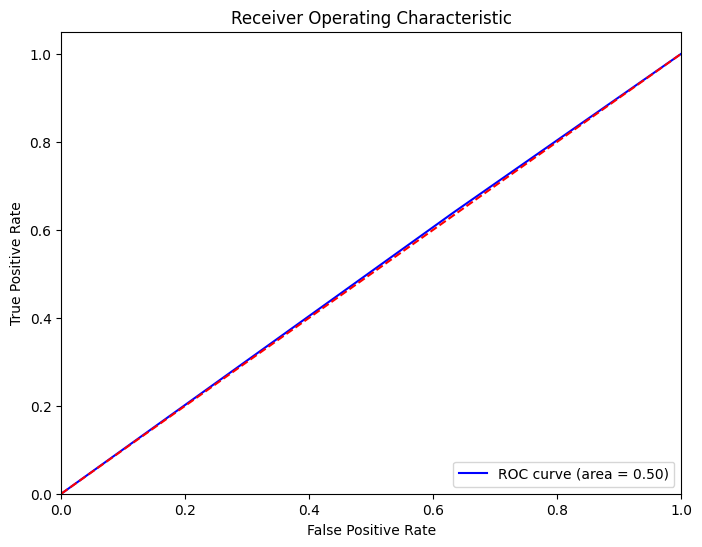

In [159]:
## Write your code here
# Save the model
torch.save(model.state_dict(), 'zac_logr_model.pth')

# Load the model
model = log_network(input_size=8, hidden_size=12, output_size=1)
model.load_state_dict(torch.load('zac_logr_model.pth'))

# Ensure the loaded model is in evaluation mode
model.eval()
# Test the loaded model on the test set
y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
# Print classification report for the loaded model
print(classification_report(y_test, y_pred))
# Plot ROC curve for the loaded model
plot_roc_curve(y_test, y_pred_proba)






### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


Epoch [1/100], Train Loss: 0.7386, Test Loss: 0.7385
Epoch [2/100], Train Loss: 0.7406, Test Loss: 0.7316
Epoch [3/100], Train Loss: 0.7272, Test Loss: 0.7259
Epoch [4/100], Train Loss: 0.7283, Test Loss: 0.7207
Epoch [5/100], Train Loss: 0.7176, Test Loss: 0.7164
Epoch [6/100], Train Loss: 0.7183, Test Loss: 0.7125
Epoch [7/100], Train Loss: 0.7144, Test Loss: 0.7090
Epoch [8/100], Train Loss: 0.7092, Test Loss: 0.7062
Epoch [9/100], Train Loss: 0.7052, Test Loss: 0.7038
Epoch [10/100], Train Loss: 0.7077, Test Loss: 0.7015
Epoch [11/100], Train Loss: 0.7026, Test Loss: 0.6996
Epoch [12/100], Train Loss: 0.6995, Test Loss: 0.6980
Epoch [13/100], Train Loss: 0.6977, Test Loss: 0.6967
Epoch [14/100], Train Loss: 0.6972, Test Loss: 0.6955
Epoch [15/100], Train Loss: 0.6954, Test Loss: 0.6944
Epoch [16/100], Train Loss: 0.6928, Test Loss: 0.6937
Epoch [17/100], Train Loss: 0.6926, Test Loss: 0.6929
Epoch [18/100], Train Loss: 0.6931, Test Loss: 0.6922
Epoch [19/100], Train Loss: 0.6918, T

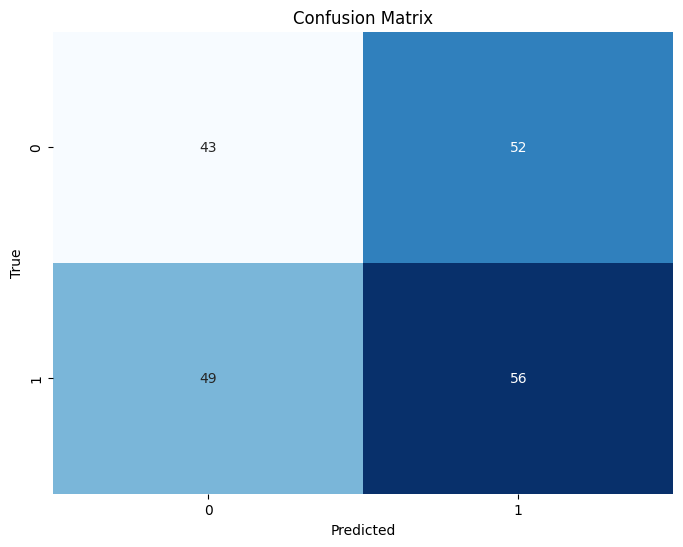

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        95
           1       0.52      0.53      0.53       105

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



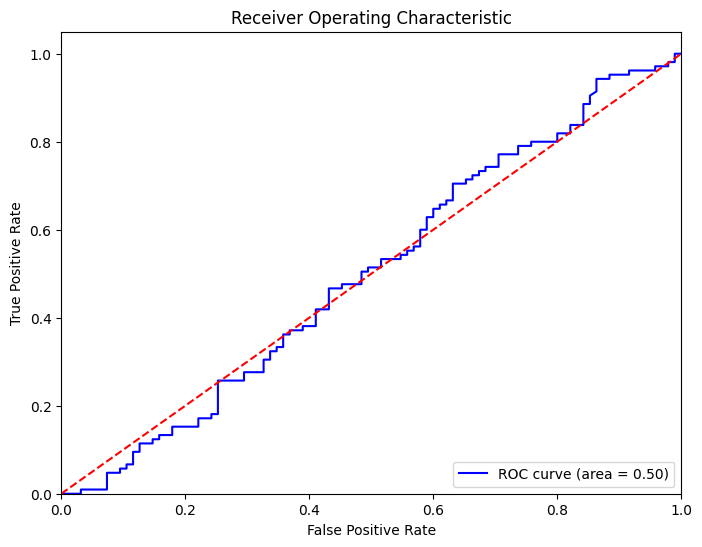

Epoch [1/100], Train Loss: 0.6972, Test Loss: 0.7135
Epoch [2/100], Train Loss: 0.6971, Test Loss: 0.7115
Epoch [3/100], Train Loss: 0.6956, Test Loss: 0.7100
Epoch [4/100], Train Loss: 0.6946, Test Loss: 0.7085
Epoch [5/100], Train Loss: 0.6947, Test Loss: 0.7074
Epoch [6/100], Train Loss: 0.6935, Test Loss: 0.7064
Epoch [7/100], Train Loss: 0.6935, Test Loss: 0.7054
Epoch [8/100], Train Loss: 0.6934, Test Loss: 0.7043
Epoch [9/100], Train Loss: 0.6929, Test Loss: 0.7035
Epoch [10/100], Train Loss: 0.6922, Test Loss: 0.7027
Epoch [11/100], Train Loss: 0.6920, Test Loss: 0.7022
Epoch [12/100], Train Loss: 0.6916, Test Loss: 0.7016
Epoch [13/100], Train Loss: 0.6920, Test Loss: 0.7011
Epoch [14/100], Train Loss: 0.6901, Test Loss: 0.7007
Epoch [15/100], Train Loss: 0.6906, Test Loss: 0.7002
Epoch [16/100], Train Loss: 0.6903, Test Loss: 0.6998
Epoch [17/100], Train Loss: 0.6901, Test Loss: 0.6995
Epoch [18/100], Train Loss: 0.6894, Test Loss: 0.6994
Epoch [19/100], Train Loss: 0.6900, T

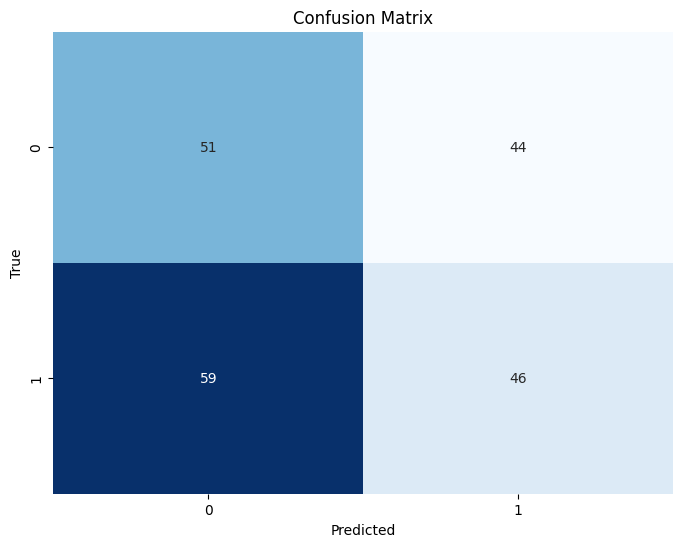

              precision    recall  f1-score   support

           0       0.46      0.54      0.50        95
           1       0.51      0.44      0.47       105

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.48      0.48       200



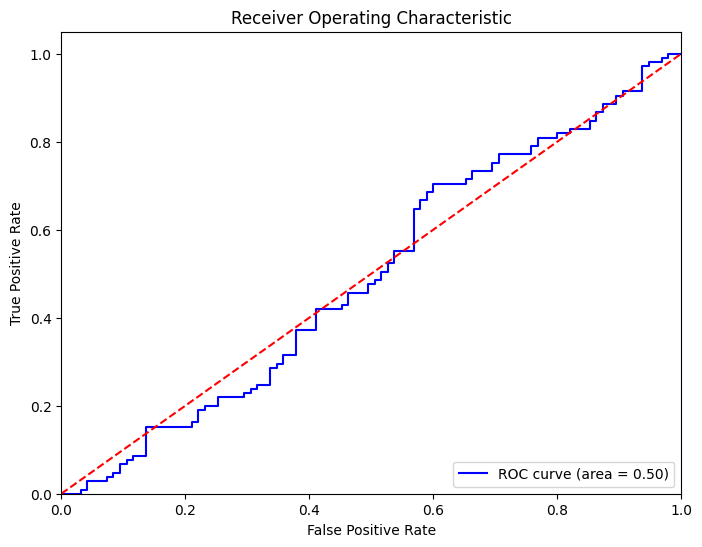

Epoch [1/100], Train Loss: 0.7071, Test Loss: 0.6984
Epoch [2/100], Train Loss: 0.6960, Test Loss: 0.6946
Epoch [3/100], Train Loss: 0.6939, Test Loss: 0.6929
Epoch [4/100], Train Loss: 0.6929, Test Loss: 0.6927
Epoch [5/100], Train Loss: 0.6936, Test Loss: 0.6935
Epoch [6/100], Train Loss: 0.6917, Test Loss: 0.6927
Epoch [7/100], Train Loss: 0.6904, Test Loss: 0.6929
Epoch [8/100], Train Loss: 0.6900, Test Loss: 0.6932
Epoch [9/100], Train Loss: 0.6894, Test Loss: 0.6934
Epoch [10/100], Train Loss: 0.6896, Test Loss: 0.6936
Epoch [11/100], Train Loss: 0.6890, Test Loss: 0.6938
Epoch [12/100], Train Loss: 0.6886, Test Loss: 0.6940
Epoch [13/100], Train Loss: 0.6875, Test Loss: 0.6943
Epoch [14/100], Train Loss: 0.6877, Test Loss: 0.6945
Epoch [15/100], Train Loss: 0.6876, Test Loss: 0.6952
Epoch [16/100], Train Loss: 0.6875, Test Loss: 0.6958
Epoch [17/100], Train Loss: 0.6857, Test Loss: 0.6961
Epoch [18/100], Train Loss: 0.6873, Test Loss: 0.6963
Epoch [19/100], Train Loss: 0.6862, T

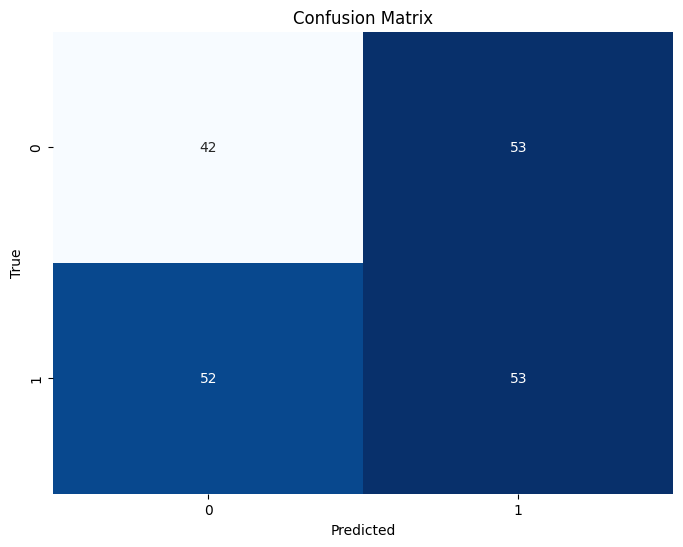

              precision    recall  f1-score   support

           0       0.45      0.44      0.44        95
           1       0.50      0.50      0.50       105

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



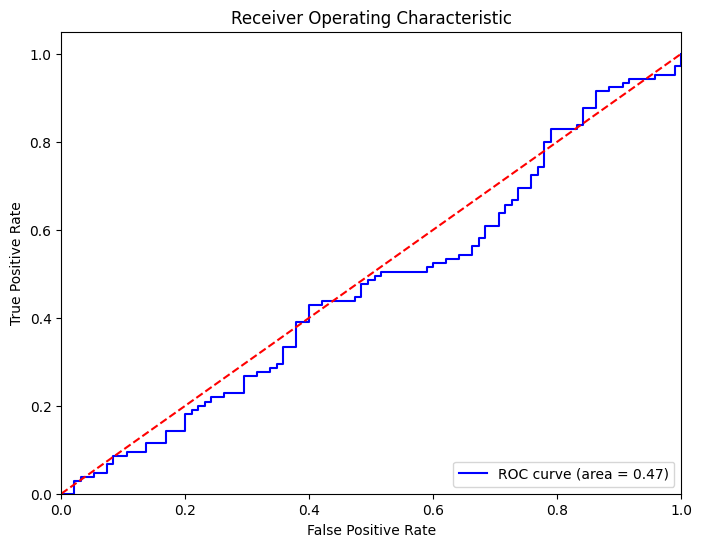

In [160]:
## Write your code here

#lr =0.01
epochs = 100
model = log_network(input_size=8, hidden_size=12, output_size=1) 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  #

# Now train the model...
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

y_pred_proba = []
with torch.no_grad():
    for x_batch, _ in test_loader:
        y_pred_batch = model(x_batch)
        y_pred_proba.append(y_pred_batch.squeeze().numpy())
y_pred_proba = np.concatenate(y_pred_proba)
plot_roc_curve(y_test, y_pred_proba)


model = log_network(input_size=8, hidden_size=12, output_size=1) 
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)  # Change learning rate to 0.05

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

y_pred_proba = []
with torch.no_grad():
    for x_batch, _ in test_loader:
        y_pred_batch = model(x_batch)
        y_pred_proba.append(y_pred_batch.squeeze().numpy())
y_pred_proba = np.concatenate(y_pred_proba)
plot_roc_curve(y_test, y_pred_proba)


#lr =0.1
model = log_network(input_size=8, hidden_size=12, output_size=1) 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Change learning rate to 0.1

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            loss = criterion(y_pred.squeeze(), y_batch.float())
            test_loss += loss.item()
        
    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

y_pred = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred_batch = model(x_batch)
        predicted = (y_pred_batch > 0.5).float()
        y_pred.append(predicted.squeeze().numpy())
y_pred = np.concatenate(y_pred)
plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

y_pred_proba = []
with torch.no_grad():
    for x_batch, _ in test_loader:
        y_pred_batch = model(x_batch)
        y_pred_proba.append(y_pred_batch.squeeze().numpy())
y_pred_proba = np.concatenate(y_pred_proba)
plot_roc_curve(y_test, y_pred_proba)



### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


Feature Importance:
         Feature  Importance
4            cs    0.141461
3   gold_earned    0.074765
0         kills    0.040068
5  wards_placed    0.002237
6  wards_killed   -0.090770
7  damage_dealt   -0.101842
2       assists   -0.116097
1        deaths   -0.126834


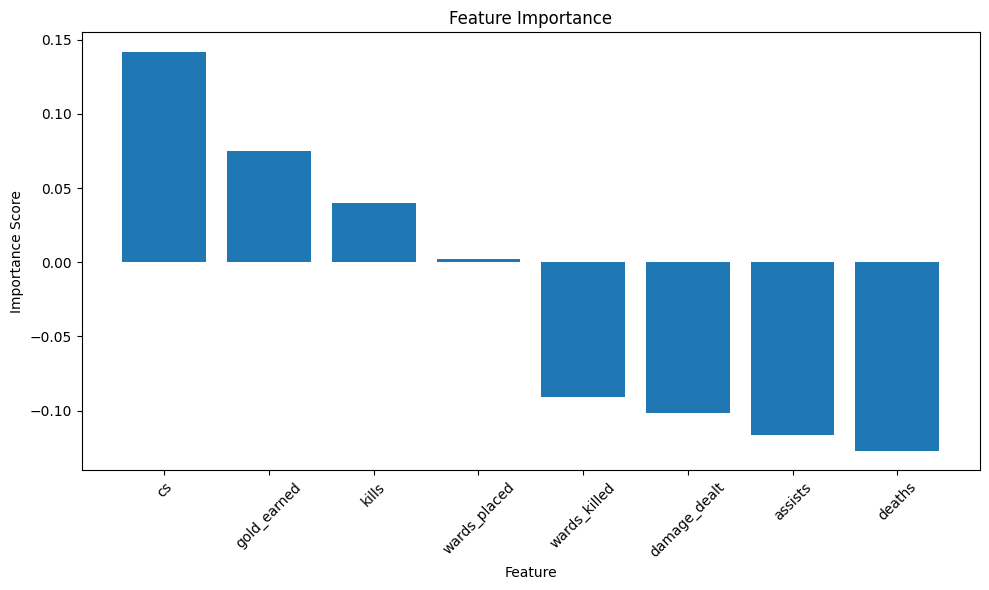

In [179]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
## Write your code here
weights_martix = model.fc1.weight.data.numpy()

importance_score = np.mean(weights_martix, axis=0)

feature_names = X.columns

 # Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature' : feature_names, 'Importance': importance_score})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(f'Feature Importance:\n {feature_importance}')

## Write your code here

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
